<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/FactorialAnalysisNonParametrical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternativas No Paramétricas a ANOVA: Kruskal-Wallis y Friedman

## Introducción

El análisis de varianza (ANOVA) es una herramienta estadística utilizada para comparar las medias de tres o más grupos. Sin embargo, ANOVA asume que los datos son normalmente distribuidos y que las varianzas son homogéneas. En situaciones donde estas condiciones no se cumplen, se pueden emplear métodos no paramétricos como el test de Kruskal-Wallis y el test de Friedman.

## Test de Kruskal-Wallis

### Descripción

El test de Kruskal-Wallis es una alternativa no paramétrica a ANOVA de una vía. Este test evalúa si hay diferencias significativas entre las medianas de tres o más grupos independientes. Se basa en la clasificación de los datos en lugar de sus valores originales.

### Cuándo utilizarlo

Utiliza el test de Kruskal-Wallis cuando:
- Tienes tres o más grupos independientes.
- Los datos no cumplen con los supuestos de normalidad o igualdad de varianzas.

### Ejemplo en Salud

Dado un estudio que evalúa la efectividad de tres diferentes tratamientos para reducir la presión arterial en pacientes hipertensos. La presión arterial se mide después de un tratamiento de ocho semanas.

1. **Grupo A**: Tratamiento 1
2. **Grupo B**: Tratamiento 2
3. **Grupo C**: Tratamiento 3

Si se tiene una distribución no normal de las reducciones de presión arterial, se podría aplicar el test de Kruskal-Wallis para determinar si hay diferencias significativas en la eficacia de los tratamientos.

### Cita Bibliográfica

- Altman, D. G., & Bland, J. M. (1996). Statistics notes: Absence of evidence is not evidence of absence. *BMJ*, 313(7061), 36. DOI: [10.1136/bmj.313.7061.36](https://doi.org/10.1136/bmj.313.7061.36)

## Test de Friedman

### Descripción

El test de Friedman es una alternativa no paramétrica al ANOVA de datos pareados (o también medidas repetidas). Este método se utiliza para evaluar diferencias entre grupos cuando las muestras son dependientes, es decir, cuando se aplican mediciones en distinto momento en el tiempo sobre los mismos sujetos.

### Cuándo utilizarlo

Utiliza el test de Friedman cuando:
- Tienes tres o más grupos relacionados o dependientes.
- Los datos no cumplen con los supuestos de normalidad.
- Es un análisis de datos pareados.

### Ejemplo en Salud

Suponga un estudio que mide los niveles de colesterol en pacientes antes y después de aplicar tres dietas diferentes durante un mes.

1. **Mes 1**: Dieta A
2. **Mes 2**: Dieta B
3. **Mes 3**: Dieta C

Dado que los mismos pacientes son evaluados en cada dieta, el test de Friedman es adecuado para determinar si hay diferencias significativas en los niveles de colesterol entre las tres dietas.

### Cita Bibliográfica

- Siegel, S., & Castellan, N. J. (1988). Nonparametric Statistics for the Behavioral Sciences. *McGraw-Hill*, 2nd edition. DOI: [10.1016/B978-0-08-057049-8.50047-6](https://doi.org/10.1016/B978-0-08-057049-8.50047-6)

## Conclusión

Tanto el test de Kruskal-Wallis como el test de Friedman son herramientas estadísticas valiosas cuando los supuestos del ANOVA no se pueden cumplir. Su aplicación en el campo de la salud es fundamental, ya que muchas variables biomédicas no se distribuyen normalmente y requieren métodos robustos para su análisis.

## EJEMPLO

Se analizan 3 dientas y su influencia en el colesterol de una serie de pacientes. Se mide el colesterol en un momento inicial y otro final. Se pide realizar un análisis factorial.

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial
np.random.seed(42)  # Para reproducibilidad
n = 30  # Número de participantes en cada grupo

# Simulación de datos
# Colesterol inicial (no normalmente distribuido)
diet_a_before = np.random.exponential(200, n)  # Dieta A
diet_b_before = np.random.exponential(210, n)  # Dieta B
diet_c_before = np.random.exponential(205, n)  # Dieta C

# Colesterol tras 6 semanas (suponiendo una reducción)
diet_a_after = diet_a_before - np.random.uniform(10, 20, n)
diet_b_after = diet_b_before - np.random.uniform(5, 15, n)
diet_c_after = diet_c_before - np.random.uniform(15, 25, n)

# Crear un DataFrame
data = pd.DataFrame({
    'Group': ['Dieta A'] * n + ['Dieta B'] * n + ['Dieta C'] * n,
    'Before': np.concatenate([diet_a_before, diet_b_before, diet_c_before]),
    'After': np.concatenate([diet_a_after, diet_b_after, diet_c_after])
})

data.head()

,Group,Before,After
0,Dieta A,93.853618,82.657676
1,Dieta A,602.024286,584.891838
2,Dieta A,263.349139,245.741288
3,Dieta A,182.588511,166.975739
4,Dieta A,33.924974,16.215302


## ILUSTRAMOS LAS MUESTRAS MEDIANTE BOXPLOT MOMENTO INICIAL

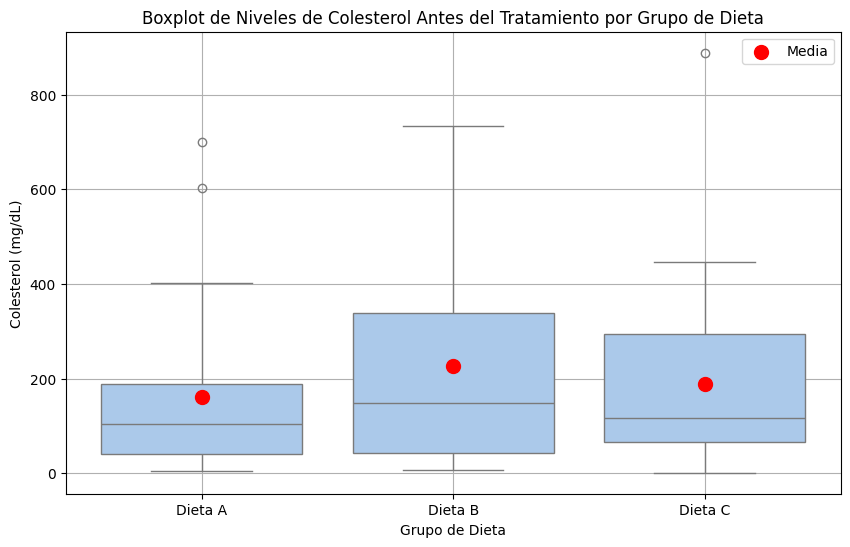

In [6]:
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
boxplot = sns.boxplot(x='Group', y='Before', data=data)

# Calcular y mostrar la media muestral de cada grupo
means = data.groupby('Group')['Before'].mean()
for i, mean in enumerate(means):
    plt.scatter(i, mean, color='red', s=100, label='Media' if i == 0 else "", zorder=3)

# Títulos y etiquetas
plt.title('Boxplot de Niveles de Colesterol Antes del Tratamiento por Grupo de Dieta')
plt.ylabel('Colesterol (mg/dL)')
plt.xlabel('Grupo de Dieta')
plt.grid()

# Leyenda para la media
plt.legend()

# Mostrar el gráfico
plt.show()

## ANÁLISIS DE LA NORMALIDAD Y HOMOCEDASATICIDAD DE LAS MUESTRAS

In [7]:
# Importar la función para el test de normalidad
from scipy.stats import shapiro

# Realizar el test de normalidad para cada grupo
groups = data['Group'].unique()  # Obtener los nombres de los grupos
normality_results = {}

for group in groups:
    # Filtrar los datos del grupo
    sample = data[data['Group'] == group]['Before']
    # Realizar el test de Shapiro-Wilk
    stat, p_value = shapiro(sample)
    normality_results[group] = (stat, p_value)
    print(f"Grupo: {group} - Estadístico: {stat:.3f}, p-valor: {p_value:.3f}")

# Interpretación de los resultados
alpha = 0.05
for group, (stat, p) in normality_results.items():
    if p < alpha:
        print(f"Se rechaza la hipótesis nula para {group}: los datos no siguen una distribución normal.")
    else:
        print(f"No se rechaza la hipótesis nula para {group}: los datos podrían seguir una distribución normal.")

Grupo: Dieta A - Estadístico: 0.795, p-valor: 0.000
Grupo: Dieta B - Estadístico: 0.838, p-valor: 0.000
Grupo: Dieta C - Estadístico: 0.817, p-valor: 0.000
Se rechaza la hipótesis nula para Dieta A: los datos no siguen una distribución normal.
Se rechaza la hipótesis nula para Dieta B: los datos no siguen una distribución normal.
Se rechaza la hipótesis nula para Dieta C: los datos no siguen una distribución normal.


Una vez constatamos que las muestras no siguen una distribución normal, procedemos a realizar una primera comprobación obligada:

### Las muestras entre grupos, ¿tienen diferencias significativas?

El test que hay que utilizar cumple las condiciones de Kruskal-Wallis.

In [8]:
# Importar la función para el test de Kruskal-Wallis
from scipy.stats import kruskal

# Realizar el test de Kruskal-Wallis entre los grupos "Before"
diet_a_before = data[data['Group'] == 'Dieta A']['Before']
diet_b_before = data[data['Group'] == 'Dieta B']['Before']
diet_c_before = data[data['Group'] == 'Dieta C']['Before']

stat_kruskal, p_kruskal = kruskal(diet_a_before, diet_b_before, diet_c_before)

# Resultados del test
print(f'Estadístico de Kruskal-Wallis: {stat_kruskal:.3f}, p-valor: {p_kruskal:.3f}')

# Interpretación del p-valor
alpha = 0.05
if p_kruskal < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre los grupos.")

Estadístico de Kruskal-Wallis: 0.761, p-valor: 0.684
No se rechaza la hipótesis nula: no hay diferencias significativas entre los grupos.


# Importancia del Buen Balanceo de Datos en Estudios de Datos Pareados de Tres o Más Grupos

## Introducción
El balanceo de los datos es un aspecto crucial en el diseño de estudios estadísticos, especialmente en aquellos que implican comparaciones entre tres o más grupos. En el contexto de los estudios de datos pareados, donde se miden las respuestas de los mismos sujetos en diferentes condiciones o tratamientos, el balanceo adecuado es esencial para asegurar la validez y la precisión de las inferencias estadísticas.

## Qué es el Balanceo de Datos
El balanceo de datos se refiere a la distribución equitativa de los sujetos o muestras entre los diferentes grupos de tratamiento en un estudio. En un diseño pareado, esto significa que cada sujeto es evaluado bajo diferentes condiciones, y se debe asegurar que la cantidad de pares de datos sea igual para cada condición.

## Importancia del Buen Balanceo

1. **Reducción del Sesgo**:
   - Un buen balanceo ayuda a minimizar el sesgo en las estimaciones de las medias y varianzas de los grupos. Si un grupo tiene considerablemente más observaciones que otro, esto puede distorsionar los resultados y llevar a conclusiones incorrectas.

2. **Incremento de la Potencia Estadística**:
   - La potencia estadística se refiere a la capacidad de un test para detectar diferencias reales cuando estas existen. Un diseño balanceado permite una mayor potencia, reduciendo las posibilidades de cometer errores tipo II (no detectar un efecto que realmente existe).

3. **Mayor Fiabilidad en la Comparación**:
   - En estudios pareados, el balanceo asegura que las comparaciones se realicen con un número igual de observaciones bajo cada tratamiento. Esto contribuye a una interpretación más confiable de las diferencias entre los grupos.

4. **Facilitación de Análisis Estadísticos**:
   - Muchos métodos estadísticos, incluidos ANOVA y otros tests de hipótesis, asumen una igualdad en los tamaños de muestra. El balanceo permite aplicar estos métodos con más confianza, aumentando la validez de los resultados.

5. **Control de la Variabilidad**:
   - Un diseño balanceado permite un mejor control de la variabilidad entre los grupos, ya que las diferencias observadas pueden atribuirse más a los tratamientos que se están evaluando y no a fluctuaciones aleatorias en las muestras.

   ## Cita Bibliográfica
- Montgomery, D. C. (2017). *Design and Analysis of Experiments*. Wiley. DOI: [10.1002/9781119335642](https://doi.org/10.1002/9781119335642)


# ANÁLISIS DE DATOS PAREADOS

## ¿EXISTEN DIFERENCIAS ENTRE MOMENTO INICIAL Y FINAL?

En este caso, se utiliza un método no paramétrico de datos pareados, ee utiliza el test de Friedman

- Janez Demšar. 2006. Statistical Comparisons of Classifiers over Multiple Data Sets. J. Mach. Learn. Res. 7 (12/1/2006), 1–30.


In [14]:
from scipy.stats import friedmanchisquare, wilcoxon

# Realizar el test de Friedman utilizando todos los niveles de colesterol por cada dieta
# Debemos agrupar las muestras por antes y después
stat, p = friedmanchisquare(
    diet_a_before, diet_b_before, diet_c_before,
    diet_a_after, diet_b_after, diet_c_after
)

# Resultados del test
print(f'Estadístico de Friedman: {stat:.3f}, p-valor: {p:.3f}')

# Interpretación del p-valor
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las dietas.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las dietas.")

Estadístico de Friedman: 21.886, p-valor: 0.001
Se rechaza la hipótesis nula: hay diferencias significativas entre las dietas.


## Análisis Post-hoc
El análisis post-hoc se refiere a la realización de pruebas adicionales después de haber detectado diferencias significativas en un análisis preliminar, como el test de Friedman. Este enfoque permite identificar qué grupos específicos son diferentes entre sí. En este caso, se utiliza el test de Wilcoxon, que es un método no paramétrico adecuado para datos pareados.


In [15]:
# Análisis post-hoc usando el test de Wilcoxon
# Comparaciones entre dieta A, B y C - Ambas condiciones (Antes y Después)

def wilcoxon_posthoc(group1, group2, label1, label2):
    stat, p = wilcoxon(group1, group2)
    print(f'Comparación {label1} vs {label2}: Estadístico W = {stat:.3f}, p-valor = {p:.3f}')
    if p < alpha:
        print(f"Se rechaza la hipótesis nula: hay diferencias significativas entre {label1} y {label2}.\n")
    else:
        print(f"No se rechaza la hipótesis nula: no hay diferencias significativas entre {label1} y {label2}.\n")

# Comparaciones para la condición "Antes"
wilcoxon_posthoc(diet_a_before, diet_b_before, 'Dieta A Antes', 'Dieta B Antes')
wilcoxon_posthoc(diet_a_before, diet_c_before, 'Dieta A Antes', 'Dieta C Antes')
wilcoxon_posthoc(diet_b_before, diet_c_before, 'Dieta B Antes', 'Dieta C Antes')

# Comparaciones para la condición "Después"
wilcoxon_posthoc(diet_a_after, diet_b_after, 'Dieta A Después', 'Dieta B Después')
wilcoxon_posthoc(diet_a_after, diet_c_after, 'Dieta A Después', 'Dieta C Después')
wilcoxon_posthoc(diet_b_after, diet_c_after, 'Dieta B Después', 'Dieta C Después')

Comparación Dieta A Antes vs Dieta B Antes: Estadístico W = 179.000, p-valor = 0.280
No se rechaza la hipótesis nula: no hay diferencias significativas entre Dieta A Antes y Dieta B Antes.

Comparación Dieta A Antes vs Dieta C Antes: Estadístico W = 209.000, p-valor = 0.641
No se rechaza la hipótesis nula: no hay diferencias significativas entre Dieta A Antes y Dieta C Antes.

Comparación Dieta B Antes vs Dieta C Antes: Estadístico W = 205.000, p-valor = 0.584
No se rechaza la hipótesis nula: no hay diferencias significativas entre Dieta B Antes y Dieta C Antes.

Comparación Dieta A Después vs Dieta B Después: Estadístico W = 173.000, p-valor = 0.229
No se rechaza la hipótesis nula: no hay diferencias significativas entre Dieta A Después y Dieta B Después.

Comparación Dieta A Después vs Dieta C Después: Estadístico W = 218.000, p-valor = 0.777
No se rechaza la hipótesis nula: no hay diferencias significativas entre Dieta A Después y Dieta C Después.

Comparación Dieta B Después vs Die

## Explicación

Existe diferencias entre "antes" y "después" pero no "entre los grupos".

## Boxplot antes-despues

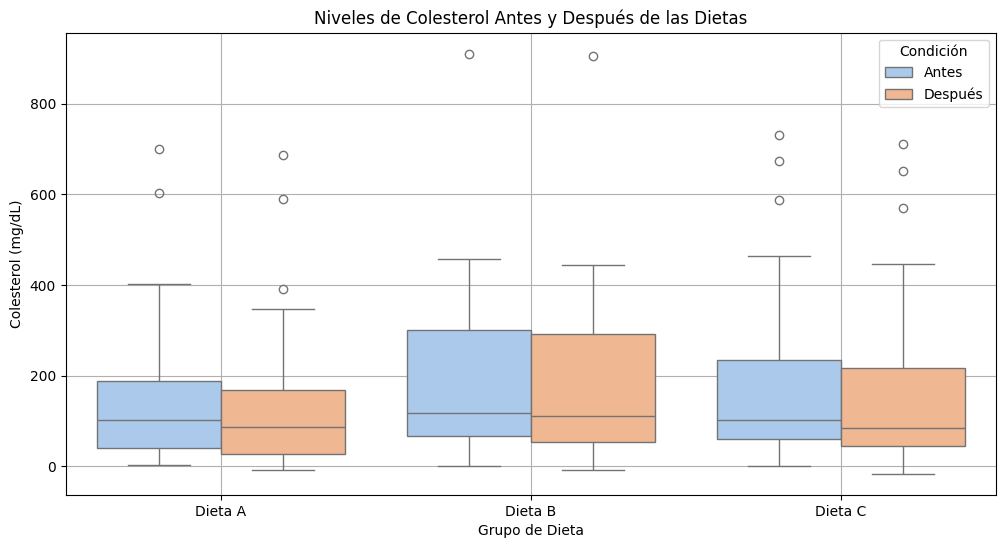

In [16]:
# Crear un DataFrame para los datos en formato largo
data = pd.DataFrame({
    'Grupo': ['Dieta A'] * n + ['Dieta A'] * n + ['Dieta B'] * n + ['Dieta B'] * n + ['Dieta C'] * n + ['Dieta C'] * n,
    'Condición': ['Antes'] * n + ['Después'] * n + ['Antes'] * n + ['Después'] * n + ['Antes'] * n + ['Después'] * n,
    'Colesterol': np.concatenate([diet_a_before, diet_a_after, diet_b_before, diet_b_after, diet_c_before, diet_c_after]),
})

# Dibujo del gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grupo', y='Colesterol', hue='Condición', data=data, palette='pastel', dodge=True)
plt.title('Niveles de Colesterol Antes y Después de las Dietas')
plt.ylabel('Colesterol (mg/dL)')
plt.xlabel('Grupo de Dieta')
plt.legend(title='Condición')
plt.grid()
plt.show()